In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import multivariate_normal as mvn
import math

from numpy.linalg import slogdet, det, solve
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import time

from sklearn.datasets import load_digits
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

import os, sys, email,re
from nltk.corpus import stopwords

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [15]:
import pandas as pd
df = pd.read_csv('scaled_df.csv')

data = pd.read_csv('scaled_df.csv')
# df = pd.DataFrame()
# df = df.join(data['PURCHASES'])
# df = df.join(data['TENURE'])
# df.insert(0, 'PURCHASES', data['PURCHASES'])
# df.insert(1, 'TENURE', data['TENURE'])
# df.insert(2, 'BALANCE', data['BALANCE'])
# df.insert(3, 'CREDIT_LIMIT', data['CREDIT_LIMIT'])

# df["PURCHASES"] = df["PURCHASES"].fillna(df["PURCHASES"].mean())
# df["TENURE"] = df["TENURE"].fillna(df["TENURE"].mean())
# df["BALANCE"] = df["BALANCE"].fillna(df["BALANCE"].mean())
# df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())
# display(df)
df = scalar.fit_transform(df)
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
# del data['CUST_ID']

gmm.fit(df)

#predictions from gmm
labels = gmm.predict(df)
frame = pd.DataFrame(df)
# frame['cluster'] = labels
# frame.columns = ['PURCHASES', 'TENURE', 'BALANCE','CREDIT_LIMIT']

# color=['blue','green','cyan', 'black']
# for k in range(0,4):
#     data = frame[frame["cluster"]==k]
#     plt.scatter(df["PURCHASES"],df["BALANCE"],c=color[k])
# plt.show()

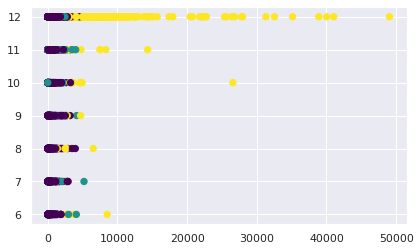

In [16]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(3, random_state=0)
labels = kmeans.fit(df).predict(df)
plt.scatter(data['PURCHASES'], data['TENURE'], c=labels, s=40, cmap='viridis');

In [17]:
from sklearn import mixture
from sklearn.mixture import GaussianMixture
# import sklearn.mixture.GMM
gmm = GaussianMixture(n_components=3).fit(df)
labels = gmm.predict(df)
# plt.scatter(df[:, 0], df[:, 1], c=labels, s=40, cmap='viridis');
labels

array([1, 0, 1, ..., 2, 0, 2])

In [18]:
probs = gmm.predict_proba(df)
print(probs[:5].round(3))

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


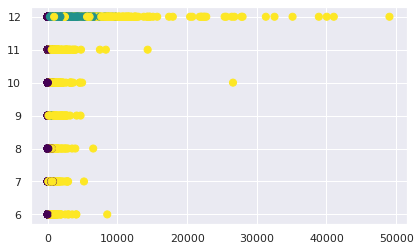

In [19]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(data['PURCHASES'], data['TENURE'], c=labels, cmap='viridis', s=size);

In [20]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(data['PURCHASES'], data['TENURE'], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(data['PURCHASES'], data['TENURE'], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

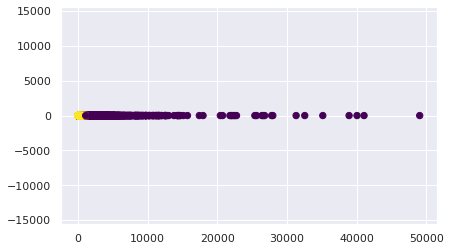

In [21]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, df)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

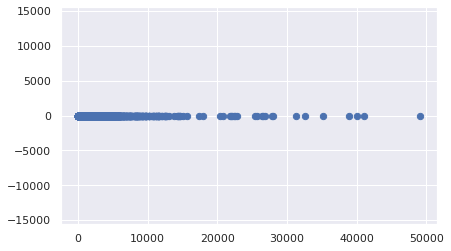

In [22]:
gmm16 = GaussianMixture(n_components=20, covariance_type='full', random_state=0)
plot_gmm(gmm16, df, label=False)

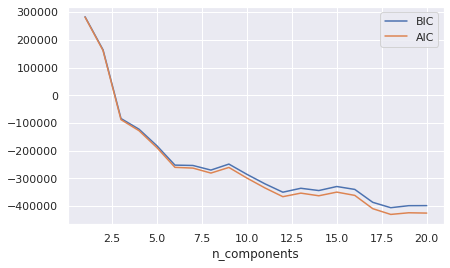

In [23]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df)
          for n in n_components]

plt.plot(n_components, [m.bic(df) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [45]:
from sklearn.metrics import silhouette_score
gmm = GaussianMixture(4, covariance_type='full', random_state=20)

gmm.fit(df)

pred = gmm.predict(df)

print ("gmm: silhouttte: ", silhouette_score(df, pred))

gmm: silhouttte:  0.09057869196194415
